In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv


In [201]:
df = pd.read_csv('/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv')

# Exploring Data

In [202]:
df.head()

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
0,1/2/2018,14982.09961,12902.71973,7006.899902,3742.0,1.684660e+10,3397430000,1929700000,497857
1,1/3/2018,15201.00000,12957.28027,7065.529785,3749.0,1.687190e+10,3544030000,2173130000,1009997
2,1/4/2018,15599.20020,13028.45996,7077.910156,3749.0,2.178320e+10,3697340000,2103220000,669448
3,1/5/2018,17429.50000,13103.23047,7136.560059,3758.0,2.384090e+10,3239280000,2024000000,2225274
4,1/8/2018,15170.09961,13114.34961,7157.390137,3744.0,1.841390e+10,3246160000,2055010000,930995


In [203]:
df.tail()

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
1254,12/23/2022,16796.95313,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614
1255,12/27/2022,16717.17383,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614
1256,12/28/2022,16552.57227,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323
1257,12/29/2022,16642.34180,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006
1258,12/30/2022,16602.58594,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1259 non-null   object 
 1   BTC            1259 non-null   float64
 2   NYSE           1259 non-null   float64
 3   NASDAQ         1259 non-null   float64
 4   LSE            1259 non-null   float64
 5   BTC_Volume     1259 non-null   float64
 6   NYSE_Volume    1259 non-null   int64  
 7   NASDAQ_Volume  1259 non-null   int64  
 8   LSE_Volume     1259 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 88.6+ KB


In [205]:
df.describe()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1.259000e+03,1.259000e+03,1.259000e+03
mean,20364.167265,13970.639288,10434.897972,6744.801312,2.816945e+10,4.230836e+09,3.700598e+09,8.657402e+05
std,17006.251216,1767.351726,2797.163873,1637.805989,2.112494e+10,1.081698e+09,1.540865e+09,6.673056e+05
min,3242.484863,8777.379883,6192.919922,3649.000000,3.230550e+09,1.296530e+09,9.589500e+08,1.402000e+04
25%,7774.829589,12676.600100,7838.044922,4806.000000,1.381063e+10,3.523815e+09,2.242010e+09,5.001880e+05
50%,10944.585940,13300.269530,10207.629880,7254.000000,2.604323e+10,3.995250e+09,3.830200e+09,7.052710e+05
75%,33576.833985,15540.665040,13034.054690,7970.000000,3.767768e+10,4.683670e+09,4.699590e+09,1.027788e+06
max,67566.828130,17353.759770,16057.440430,9910.000000,3.509680e+11,9.976520e+09,1.162119e+10,1.117657e+07


In [206]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

# EDA

In [207]:
df['BTC'].std()

17006.251216089884

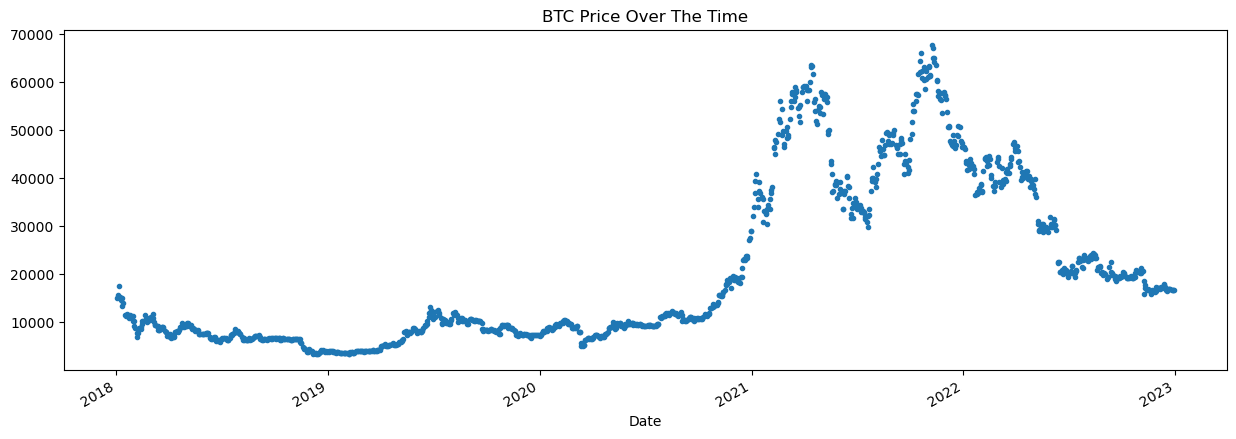

In [208]:
df['BTC'].plot(style='.',
        figsize=(15, 5), 
        title='BTC Price Over The Time')
plt.show()

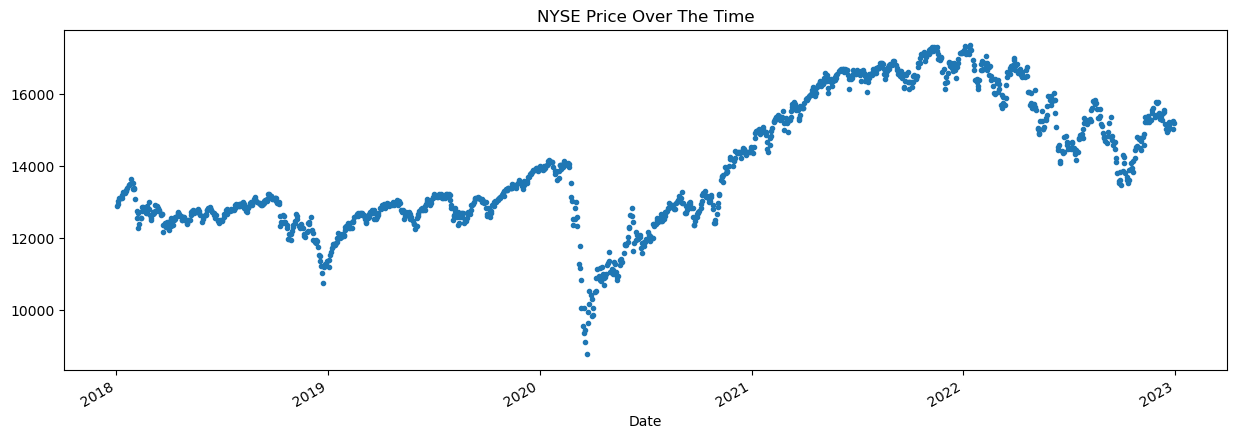

In [209]:
df['NYSE'].plot(style='.',
        figsize=(15, 5), 
        title='NYSE Price Over The Time')
plt.show()

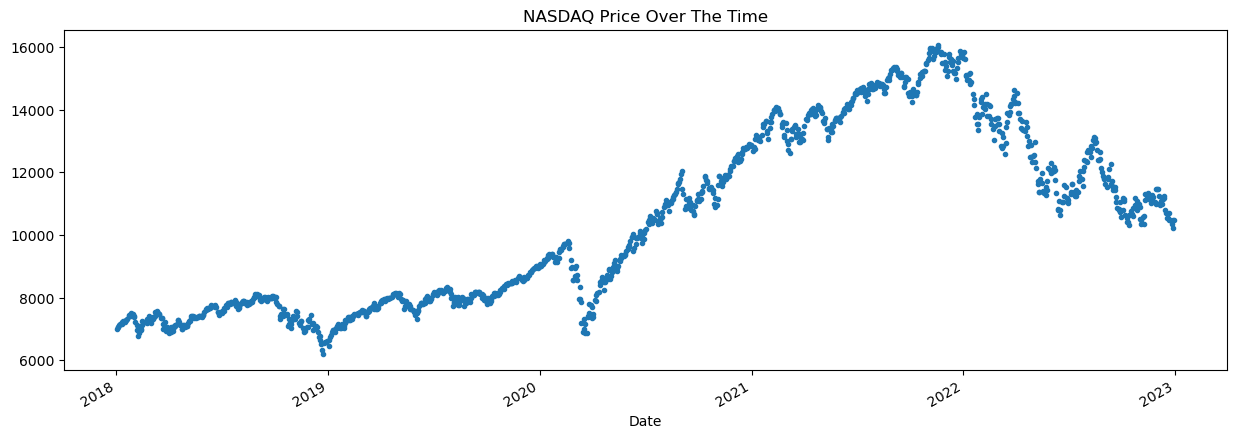

In [210]:
df['NASDAQ'].plot(style='.',
        figsize=(15, 5), 
        title='NASDAQ Price Over The Time')
plt.show()

<AxesSubplot:ylabel='Frequency'>

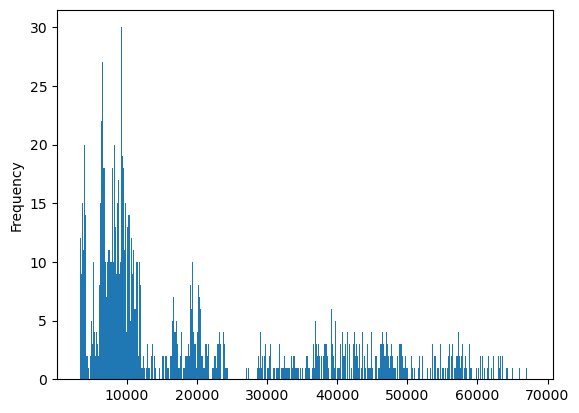

In [211]:
df['BTC'].plot(kind='hist', bins=500)

#### The distribution of the BTC price seems not like Normal Distribution

In [212]:
df['BTC'] = np.log1p(df['BTC'])

<AxesSubplot:ylabel='Frequency'>

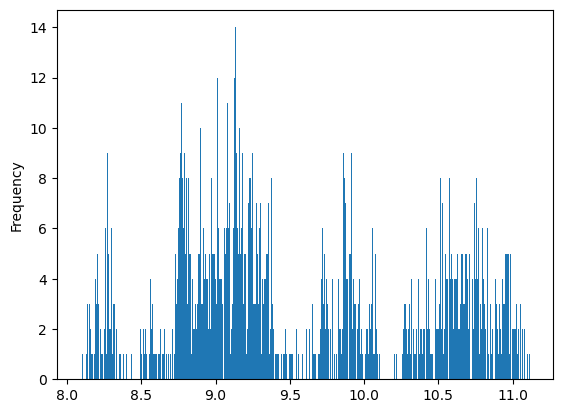

In [213]:
df['BTC'].plot(kind='hist', bins=500)

<AxesSubplot:ylabel='Frequency'>

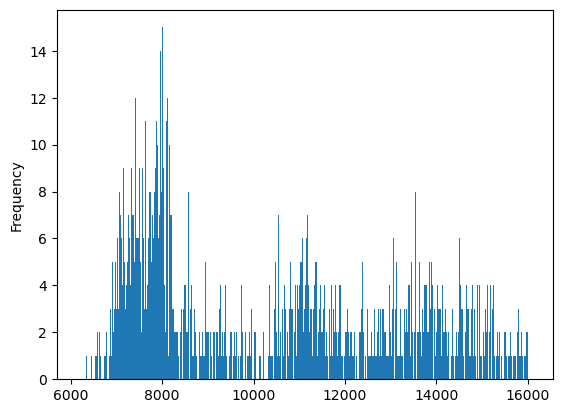

In [214]:
df['NASDAQ'].plot(kind='hist', bins=500)

<AxesSubplot:ylabel='Frequency'>

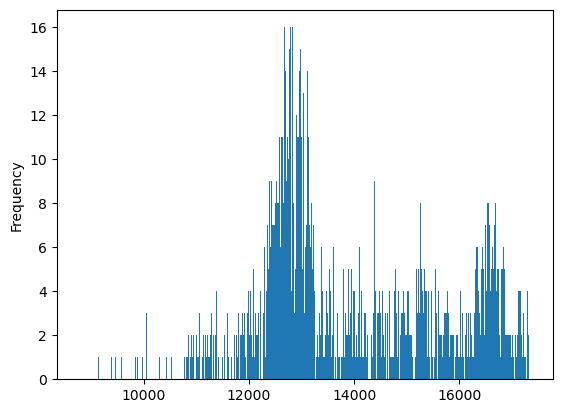

In [215]:
df['NYSE'].plot(kind='hist', bins=500)

# Train/Test split

In [216]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

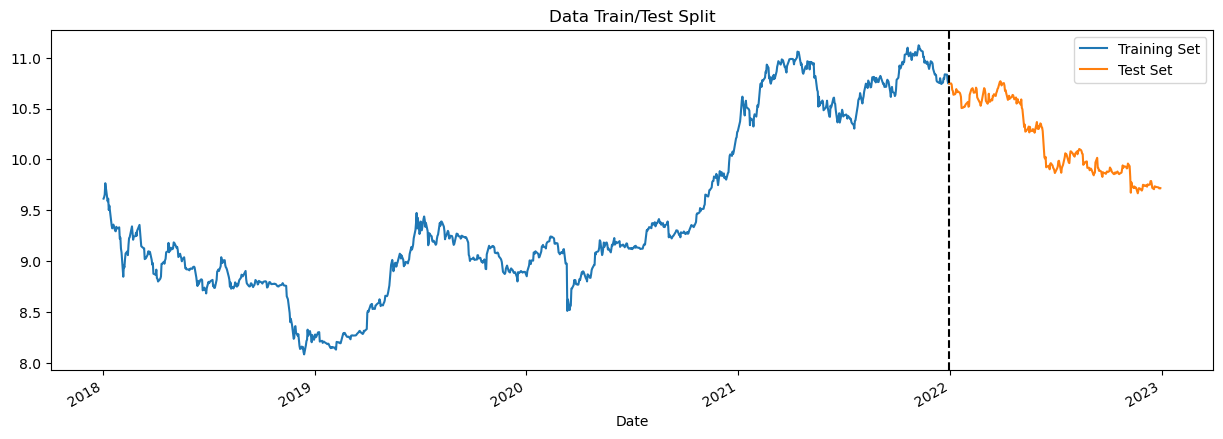

In [217]:
fig, ax = plt.subplots(figsize=(15, 5))
df_train['BTC'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['BTC'].plot(ax=ax, label='Test Set')
ax.axvline('2021-12-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Creating Features

In [218]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    return df

df = create_features(df)

In [219]:
def add_lags(df):
    target_map = df['BTC'].to_dict()
    df['btc_lag1'] = (df.index - pd.Timedelta('1 days')).map(target_map)
    df['btc_lag2'] = (df.index - pd.Timedelta('2 days')).map(target_map)
    df['btc_lag3'] = (df.index - pd.Timedelta('3 days')).map(target_map)
    return df

In [220]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [221]:
x_train = create_features(df_train)
x_train = add_lags(x_train)
x_test = create_features(df_test)
x_test = add_lags(x_test)

In [222]:
y_train = x_train['BTC']
y_test = x_test['BTC']
x_train = x_train.drop('BTC', axis =1)
x_test = x_test.drop('BTC', axis = 1)

# Model Training

In [223]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[19:32:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88101	validation_1-rmse:9.59010
[100]	validation_0-rmse:3.26955	validation_1-rmse:3.18679
[200]	validation_0-rmse:1.21201	validation_1-rmse:0.92207
[300]	validation_0-rmse:0.45965	validation_1-rmse:0.38438
[355]	validation_0-rmse:0.28022	validation_1-rmse:0.42047


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [224]:
y_pred = reg.predict(x_test)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

10993.80441295247

In [225]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual

,0,1
0,25757.669922,46306.44531
1,26948.994141,46458.11719
2,28427.867188,45897.57422
3,28427.867188,43569.00391
4,28476.085938,43160.92969
...,...,...
247,30846.296875,16796.95313
248,25757.669922,16717.17383
249,30754.119141,16552.57227
250,30754.119141,16642.34180


# Adding Technical Indicators

In [226]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
df.tail()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,moving_avg,ema_12,ema_26,macd,macd_signal
Date,,,,,,,,,,,,,,,,,,,,
2022-12-23,9.729012,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614,0,4,4,12,2022,357,23,9.740093,9.737700,9.750343,-0.012642,-0.014429
2022-12-27,9.724252,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614,0,1,4,12,2022,361,27,9.741611,9.735631,9.748410,-0.012779,-0.014099
2022-12-28,9.714357,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323,0,2,4,12,2022,362,28,9.741937,9.732358,9.745888,-0.013529,-0.013985
2022-12-29,9.719766,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006,0,3,4,12,2022,363,29,9.740381,9.730421,9.743953,-0.013532,-0.013894
2022-12-30,9.717374,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505,0,4,4,12,2022,364,30,9.739295,9.728414,9.741984,-0.013570,-0.013829


In [227]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [228]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [229]:
x_train = create_features(df_train)
x_train = add_lags(x_train)
x_test = create_features(df_test)
x_test = add_lags(x_test)
y_train = x_train['BTC']
y_test = x_test['BTC']
x_train = x_train.drop('BTC', axis =1)
x_test = x_test.drop('BTC', axis = 1)

In [230]:
x_train.fillna(method = 'ffill', inplace = True)
x_test.fillna(method = 'ffill', inplace = True)

In [231]:
x_train.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)
x_test.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)

In [232]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[19:32:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88100	validation_1-rmse:9.59092
[100]	validation_0-rmse:3.26511	validation_1-rmse:3.35472
[200]	validation_0-rmse:1.20232	validation_1-rmse:1.15806
[300]	validation_0-rmse:0.44477	validation_1-rmse:0.37062
[400]	validation_0-rmse:0.16862	validation_1-rmse:0.15648
[479]	validation_0-rmse:0.08469	validation_1-rmse:0.15804


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [233]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

4451.389969480461

In [234]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual

,0,1
0,25372.156250,46306.44531
1,27975.802734,46458.11719
2,39592.984375,45897.57422
3,39984.437500,43569.00391
4,39359.750000,43160.92969
...,...,...
247,16099.727539,16796.95313
248,16099.727539,16717.17383
249,16099.727539,16552.57227
250,16099.727539,16642.34180


In [235]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['BTC'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume,hour,dayofweek,...,year,dayofyear,dayofmonth,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,9.729012,15188.45020,10497.86035,7130.0,1.532927e+10,2819280000,3544680000,141614,0,4,...,2022,357,23,9.740093,9.737700,9.750343,-0.012642,-0.014429,47.428898,-64.0
2022-12-27,9.724252,15218.25977,10353.23047,7130.0,1.574858e+10,3030300000,3827290000,141614,0,1,...,2022,361,27,9.741611,9.735631,9.748410,-0.012779,-0.014099,44.571205,-64.0
2022-12-28,9.714357,15037.32031,10213.29004,7128.0,1.700571e+10,3083520000,3842970000,490323,0,2,...,2022,362,28,9.741937,9.732358,9.745888,-0.013529,-0.013985,45.543204,-60.0
2022-12-29,9.719766,15241.20996,10478.08984,7212.0,1.447224e+10,3003680000,4154100000,457006,0,3,...,2022,363,29,9.740381,9.730421,9.743953,-0.013532,-0.013894,40.376468,-48.0
2022-12-30,9.717374,15184.30957,10466.48047,7136.0,1.592916e+10,2979870000,3959030000,226505,0,4,...,2022,364,30,9.739295,9.728414,9.741984,-0.013570,-0.013829,41.158741,-48.0


In [236]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [237]:
df_train = df_train.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df_test = df_test.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)

In [238]:
x_train = df_train.drop('BTC', axis = 1)
y_train = df_train.BTC
x_test = df_test.drop('BTC', axis = 1)
y_test = df_test.BTC

In [239]:
x_train.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)
x_test.drop(['hour', 'dayofweek', 'quarter', 'month', 'year'], axis = 1, inplace = True)

In [240]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)


[19:32:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.88100	validation_1-rmse:9.59092
[100]	validation_0-rmse:3.26541	validation_1-rmse:3.34334
[200]	validation_0-rmse:1.20359	validation_1-rmse:1.12566
[300]	validation_0-rmse:0.44673	validation_1-rmse:0.34886
[400]	validation_0-rmse:0.17006	validation_1-rmse:0.13760
[476]	validation_0-rmse:0.08705	validation_1-rmse:0.13972


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [241]:
y_pred = reg.predict(x_test)
y_test = np.expm1(y_test)
y_pred = np.expm1(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

3832.3649169677133

In [242]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8602912016563443

# Using Boxcox Normalization

In [243]:
df = pd.read_csv('/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv')
df = df.drop(['NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume', 'NASDAQ_Volume', 'LSE_Volume'], axis = 1)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

(array([ 81.,  21., 125., 204., 251.,  41., 137.,  62., 173., 164.]),
 array([4.04315912, 4.08962751, 4.13609591, 4.1825643 , 4.22903269,
        4.27550109, 4.32196948, 4.36843787, 4.41490626, 4.46137466,
        4.50784305]),
 <BarContainer object of 10 artists>)

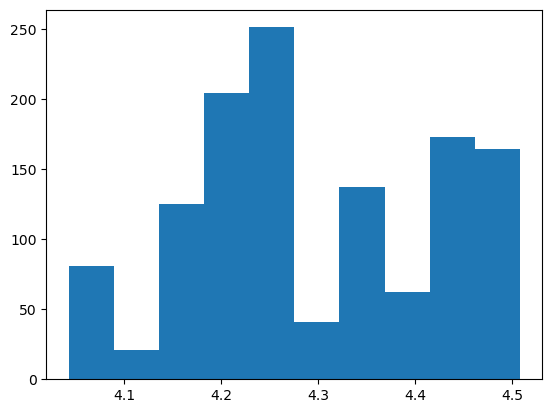

In [244]:
from scipy.stats import boxcox
data, lam_bda = boxcox(df['BTC'])
plt.hist(data)

In [245]:
df['BTC'] = data 
df.head()

,BTC
Date,
2018-01-02,4.311827
2018-01-03,4.314005
2018-01-04,4.317873
2018-01-05,4.334247
2018-01-08,4.313700


In [246]:
df['moving_avg'] = df['BTC'].rolling(window = 20).mean()
df['ema_12'] = df['BTC'].ewm(span = 12, adjust = False).mean()
df['ema_26'] = df['BTC'].ewm(span = 26, adjust = False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust = False).mean()
delta = df['BTC'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window = 14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
aroon_up = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmax() + 1))) / 25)
aroon_down = 100 * ((25 - (df['BTC'].rolling(25).apply(lambda x: x.argmin() + 1))) / 25)
df['aroon_oscillator'] = aroon_up - aroon_down
df.tail()

,BTC,moving_avg,ema_12,ema_26,macd,macd_signal,rsi,aroon_oscillator
Date,,,,,,,,
2022-12-23,4.328831,4.330451,4.330099,4.331921,-0.001822,-0.002074,47.422805,-64.0
2022-12-27,4.328131,4.330675,4.329797,4.331641,-0.001844,-0.002028,44.559768,-64.0
2022-12-28,4.326673,4.330724,4.329316,4.331273,-0.001957,-0.002014,45.523933,-60.0
2022-12-29,4.327470,4.330495,4.329032,4.330991,-0.001959,-0.002003,40.362678,-48.0
2022-12-30,4.327118,4.330335,4.328738,4.330704,-0.001967,-0.001996,41.139918,-48.0


In [247]:
size = int(len(df) * 0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]
x_train = df_train.drop('BTC', axis = 1)
y_train = df_train.BTC
x_test = df_test.drop('BTC', axis = 1)
y_test = df_test.BTC

In [248]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[19:32:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.73764	validation_1-rmse:3.85395
[100]	validation_0-rmse:1.37177	validation_1-rmse:1.39948
[200]	validation_0-rmse:0.50400	validation_1-rmse:0.49938
[300]	validation_0-rmse:0.18557	validation_1-rmse:0.16992
[400]	validation_0-rmse:0.06876	validation_1-rmse:0.05378
[500]	validation_0-rmse:0.02612	validation_1-rmse:0.01888
[591]	validation_0-rmse:0.01190	validation_1-rmse:0.01819


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [249]:
from scipy.special import inv_boxcox
y_pred = reg.predict(x_test)
y_test = inv_boxcox(y_test,lam_bda)
y_pred = inv_boxcox(y_pred, lam_bda)
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

3789.601335582413

In [250]:
pred_vs_actual = pd.DataFrame(data = [y_pred, y_test]).T
pred_vs_actual.columns = ['Pred', 'Actual']
pred_vs_actual['Date'] = x_test.index
pred_vs_actual = pred_vs_actual.set_index('Date')
pred_vs_actual

,Pred,Actual
Date,,
2021-12-31,40584.187500,46306.44531
2022-01-03,39398.253906,46458.11719
2022-01-04,39304.386719,45897.57422
2022-01-05,37316.816406,43569.00391
2022-01-06,37854.171875,43160.92969
...,...,...
2022-12-23,16233.580078,16796.95313
2022-12-27,15929.581055,16717.17383
2022-12-28,16233.580078,16552.57227


<AxesSubplot:xlabel='Date'>

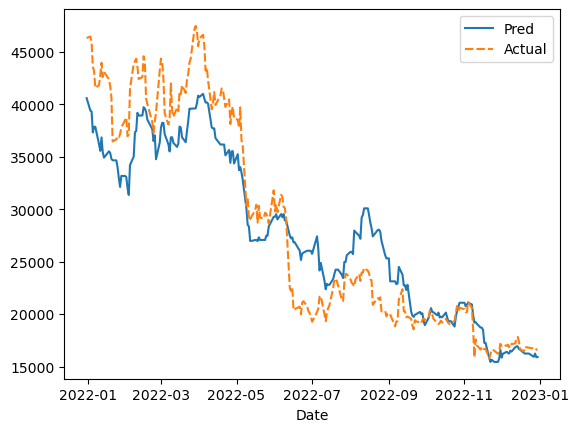

In [251]:
sns.lineplot(data = pred_vs_actual)